## EXPLORATORY DATA ANALYSIS OF ISIC 2020 DATASET

In this notebook, we visualize and understand the ISIC_SIIM dataset more

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from tabulate import tabulate

In [4]:
path = os.path.abspath('/content/drive/MyDrive/Colab Notebooks')
os.chdir(path)
print(path)

/content/drive/MyDrive/Colab Notebooks


### Loading the dataset
We load the train.csv and texst.csv meta files and view the type of data in them

In [5]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

Display the first 5 records of train.csv and the last 5 records of train.csv

In [6]:
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [7]:
train_df.tail()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0
33125,ISIC_9999806,IP_0046310,male,45.0,torso,nevus,benign,0


Display the first  5 records of test.csv and last 5 records of test.csv

In [8]:
test_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [9]:
test_df.tail()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
10977,ISIC_9992485,IP_4152479,male,40.0,torso
10978,ISIC_9996992,IP_4890115,male,35.0,torso
10979,ISIC_9997917,IP_2852390,male,25.0,upper extremity
10980,ISIC_9998234,IP_8861963,male,65.0,lower extremity
10981,ISIC_9999302,IP_6214039,male,30.0,upper extremity


### Inspecting of the datasets

We look at the size, structure and type of each column in the dataset

In [10]:
print("The number of rows and columne in train.csv: {}".format(train_df.shape))
print("The number of rows and columne in test.csv: {}".format(test_df.shape))

The number of rows and columne in train.csv: (33126, 8)
The number of rows and columne in test.csv: (10982, 5)


In [11]:
train_df.dtypes

image_name                        object
patient_id                        object
sex                               object
age_approx                       float64
anatom_site_general_challenge     object
diagnosis                         object
benign_malignant                  object
target                             int64
dtype: object

In [12]:
train_df.count()

image_name                       33126
patient_id                       33126
sex                              33061
age_approx                       33058
anatom_site_general_challenge    32599
diagnosis                        33126
benign_malignant                 33126
target                           33126
dtype: int64

Let us show some of the training images, for fun.



In [13]:
train_df.describe()

,age_approx,target
count,33058.000000,33126.000000
mean,48.870016,0.017630
std,14.380360,0.131603
min,0.000000,0.000000
25%,40.000000,0.000000
50%,50.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [15]:
train_df.isna().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [16]:
train_df.isnull().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [17]:
train_df.dropna(axis=0, inplace=True)

In [18]:
print("The number of rows and columne in train.csv: {}".format(train_df.shape))
print(train_df.columns)

The number of rows and columne in train.csv: (32531, 8)
Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target'],
      dtype='object')


Convert necessary columns to categorical data types

In [19]:
# Passed a dictionary to astype() function
train_df2 = train_df.astype({'patient_id':'category',"sex":'category', "diagnosis":'category',
                             'benign_malignant':'category','target':'category',
                             'anatom_site_general_challenge':'category'})

train_df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32531 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   image_name                     32531 non-null  object  
 1   patient_id                     32531 non-null  category
 2   sex                            32531 non-null  category
 3   age_approx                     32531 non-null  float64 
 4   anatom_site_general_challenge  32531 non-null  category
 5   diagnosis                      32531 non-null  category
 6   benign_malignant               32531 non-null  category
 7   target                         32531 non-null  category
dtypes: category(6), float64(1), object(1)
memory usage: 1.0+ MB


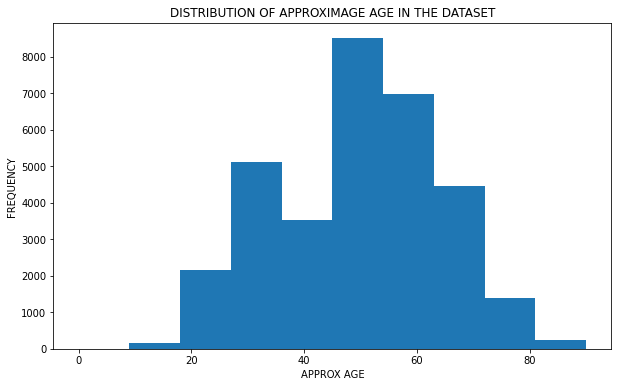

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(train_df2.age_approx)
plt.grid(False)
plt.title("DISTRIBUTION OF APPROXIMAGE AGE IN THE DATASET")
plt.xlabel("APPROX AGE")
plt.ylabel("FREQUENCY")
plt.show()

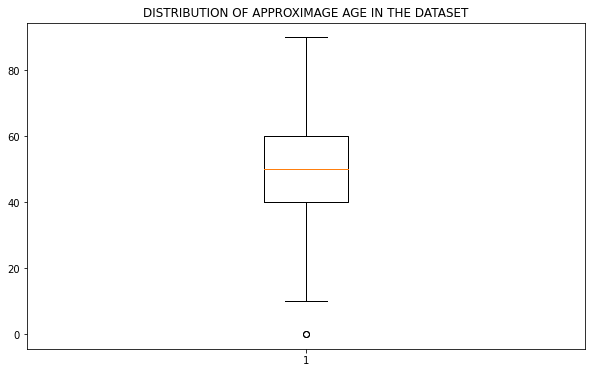

In [30]:
plt.figure(figsize=(10, 6))
plt.boxplot(train_df2.age_approx)
plt.grid(False)
plt.title("DISTRIBUTION OF APPROXIMAGE AGE IN THE DATASET")
plt.show()

In [46]:
patient_group=train_df2.groupby('patient_id').image_name
patient_group.describe()

,count,unique,top,freq
patient_id,,,,
IP_0001230,6,6,ISIC_0733981,1
IP_0019713,13,13,ISIC_2267785,1
IP_0036322,5,5,ISIC_4595555,1
IP_0038436,3,3,ISIC_2102371,1
IP_0038545,28,28,ISIC_0626653,1
...,...,...,...,...
IP_9989332,10,10,ISIC_3413403,1
IP_9992027,39,39,ISIC_0460240,1
IP_9995095,14,14,ISIC_1128317,1


In [47]:
patient_group.count().describe()

count    2051.000000
mean       15.861043
std        15.438492
min         2.000000
25%         5.000000
50%        12.000000
75%        21.000000
max       115.000000
Name: image_name, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


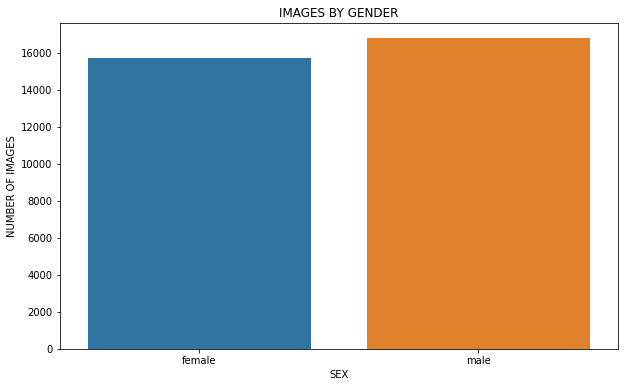

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(train_df2.sex)
plt.title("IMAGES BY GENDER")
plt.xlabel("SEX")
plt.ylabel("NUMBER OF IMAGES")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


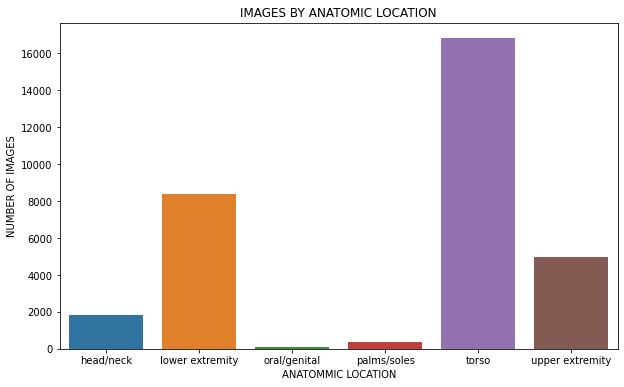

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(train_df2.anatom_site_general_challenge)
plt.title("IMAGES BY ANATOMIC LOCATION")
plt.xlabel("ANATOMMIC LOCATION")
plt.ylabel("NUMBER OF IMAGES")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


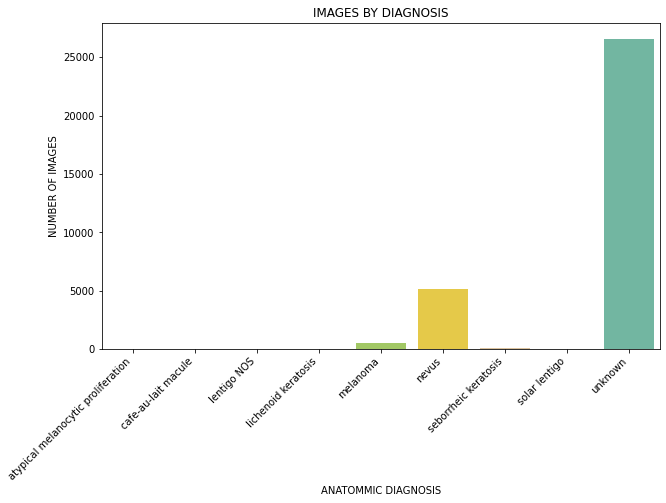

In [58]:
plt.figure(figsize=(10, 6))
chart = sns.countplot(train_df2.diagnosis,
    x="diagnosis",
    palette='Set2'
)
chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=45, horizontalalignment='right')
plt.title("IMAGES BY DIAGNOSIS")
plt.xlabel("ANATOMMIC DIAGNOSIS")
plt.ylabel("NUMBER OF IMAGES")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


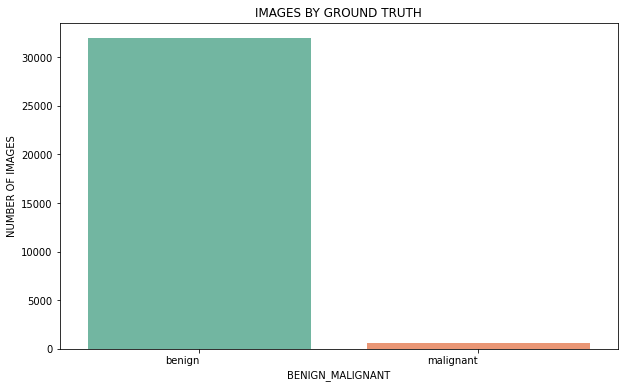

In [60]:
plt.figure(figsize=(10, 6))
chart = sns.countplot(train_df2.benign_malignant,
    x="benign_malignant",
    palette='Set2'
)
chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=0, horizontalalignment='right')
plt.title("IMAGES BY GROUND TRUTH")
plt.xlabel("BENIGN_MALIGNANT")
plt.ylabel("NUMBER OF IMAGES")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


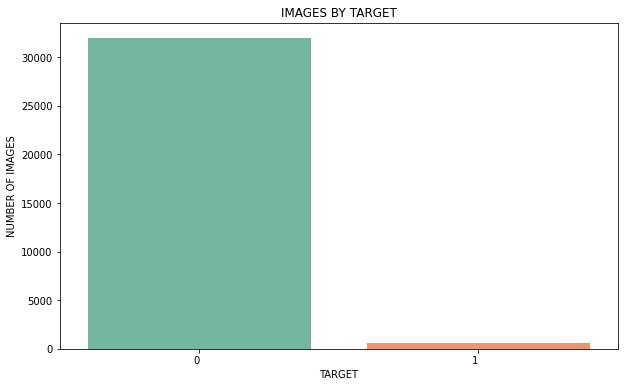

In [61]:
plt.figure(figsize=(10, 6))
chart = sns.countplot(train_df2.target,
    x="target",
    palette='Set2'
)
chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=0, horizontalalignment='right')
plt.title("IMAGES BY TARGET")
plt.xlabel("TARGET")
plt.ylabel("NUMBER OF IMAGES")
plt.show()

In [31]:
train_df2.columns

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target'],
      dtype='object')